In [1]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
runs = mlflow.search_runs('0')

In [3]:
print(runs.shape)
runs.head()

(6, 28)


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.epoch_geometry_loss_val,metrics.epoch_score_loss,metrics.epoch_geometry_loss,metrics.epoch_score_loss_val,...,params.num_epochs,params.lr_gamma,params.lambda_score,params.lr,params.model_name,params.lambda_geometry,params.lr_step_size,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.source.type
0,dd0c6d1ad96b4e5a9e8eaeb80a4b8511,0,FINISHED,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-08 07:05:12.777000+00:00,2020-07-08 14:42:43.932000+00:00,0.295984,0.140152,0.275523,0.292811,...,30,0.5,1,0.001,EAST,1,5,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk,LOCAL
1,a55c978801e34bf2adbddeea6f1960d7,0,RUNNING,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-08 04:33:45.022000+00:00,NaT,0.404100,0.351264,0.435742,0.418520,...,30,0.5,1,0.001,EAST,1,5,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk,LOCAL
2,9845cdbb6c2947e8b27fe9c7fe23dba3,0,FAILED,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-08 04:33:18.454000+00:00,2020-07-08 04:33:25.613000+00:00,NaN,NaN,NaN,NaN,...,30,0.5,1,0.001,EAST,1,5,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk,LOCAL
3,8d4ceea4ba5047a1b0f73866a5973d55,0,FAILED,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-08 04:32:33.483000+00:00,2020-07-08 04:32:44.732000+00:00,NaN,NaN,NaN,NaN,...,30,0.5,1,0.001,EAST,1,5,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk,LOCAL
4,03be809437fa414abc23624f6f59f1b5,0,FINISHED,file:///home/gokulkarthikk/Detection/mlruns/0/...,2020-07-07 09:21:33.422000+00:00,2020-07-07 17:30:21.366000+00:00,0.300330,0.205712,0.314412,0.259959,...,10,0.5,1,0.001,UNet,1,2,/opt/conda/lib/python3.7/site-packages/ipykern...,gokulkarthikk,LOCAL


In [4]:
run = runs.iloc[0, :]

In [5]:
metrics_dir = run['artifact_uri'].replace('artifacts', 'metrics/')
iterations = pd.DataFrame()
iterations['score_loss'] = pd.read_csv(metrics_dir+'iteration_score_loss', sep=" ", header=None).iloc[:, 1]
iterations['geometry_loss'] = pd.read_csv(metrics_dir+'iteration_geometry_loss', sep=" ", header=None).iloc[:, 1]
iterations['loss'] = pd.read_csv(metrics_dir+'iteration_loss', sep=" ", header=None).iloc[:, 1]

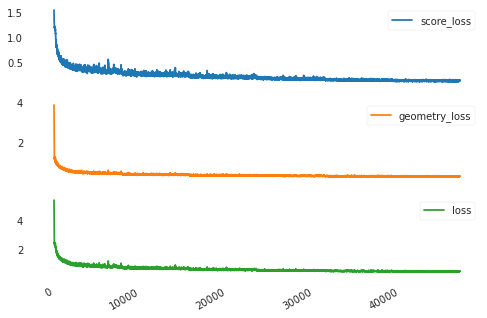

In [6]:
iterations.rolling(10).mean().plot(subplots=True)
plt.show()

In [7]:
iterations.head(n=10)

,score_loss,geometry_loss,loss
0,1.684888,4.209592,5.894480
1,1.663873,4.067216,5.731089
2,1.590570,3.857530,5.448100
3,1.598457,3.659920,5.258377
4,1.483031,4.047419,5.530449
5,1.510220,3.828367,5.338587
6,1.494552,3.885849,5.380402
7,1.427148,4.063995,5.491144
8,1.488576,3.360974,4.849550
9,1.482010,3.580058,5.062068


In [8]:
iterations.tail(n=10)

,score_loss,geometry_loss,loss
46880,0.172306,0.260817,0.433124
46881,0.150941,0.266375,0.417316
46882,0.142737,0.279282,0.422020
46883,0.166823,0.311921,0.478745
46884,0.162401,0.280118,0.442519
46885,0.158272,0.336099,0.494370
46886,0.152596,0.257100,0.409696
46887,0.112821,0.267388,0.380209
46888,0.118959,0.266123,0.385082
46889,0.157006,0.372046,0.529052


In [9]:
epochs_df = pd.DataFrame()
epochs_df['score_loss'] = pd.read_csv(metrics_dir+'epoch_score_loss', sep=" ", header=None).iloc[:, 1]
epochs_df['geometry_loss'] = pd.read_csv(metrics_dir+'epoch_geometry_loss', sep=" ", header=None).iloc[:, 1]
epochs_df['loss'] = pd.read_csv(metrics_dir+'epoch_loss', sep=" ", header=None).iloc[:, 1]
epochs_df['score_loss_val'] = pd.read_csv(metrics_dir+'epoch_score_loss_val', sep=" ", header=None).iloc[:, 1]
epochs_df['geometry_loss_val'] = pd.read_csv(metrics_dir+'epoch_geometry_loss_val', sep=" ", header=None).iloc[:, 1]
epochs_df['loss_val'] = pd.read_csv(metrics_dir+'epoch_loss_val', sep=" ", header=None).iloc[:, 1]

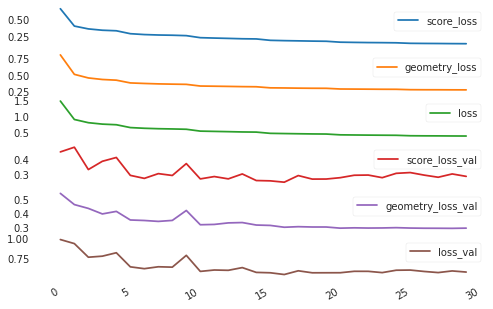

In [10]:
epochs_df.plot(subplots=True)
plt.show()

In [11]:
epochs_df

,score_loss,geometry_loss,loss,score_loss_val,geometry_loss_val,loss_val
0,0.663818,0.816002,1.479820,0.449150,0.546073,0.995224
1,0.404103,0.515348,0.919451,0.479102,0.465447,0.944549
2,0.361755,0.459764,0.821518,0.336429,0.437925,0.774353
3,0.341916,0.436038,0.777954,0.389229,0.398196,0.787425
4,0.333786,0.425377,0.759163,0.413558,0.416560,0.830118
5,0.289959,0.382799,0.672758,0.299197,0.354638,0.653834
6,0.277010,0.374551,0.651561,0.280008,0.351028,0.631036
7,0.270457,0.367919,0.638376,0.310337,0.344474,0.654812
8,0.267044,0.363933,0.630977,0.298608,0.351509,0.650117
9,0.260854,0.360554,0.621408,0.374508,0.423022,0.797530


**Trained only on score loss**

> score loss of 0.3-0.4 in val set is fine for starter 

> Best Val score Loss for U-Net: 0.36, EAST: 0.36

**Trained on score and geometry loss - best val scores**
 
* EAST:  score_loss:0.26, geo_loss:0.30